<a href="https://colab.research.google.com/github/melekbairamova20/NLP/blob/main/build_makemore_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
words = open('/content/names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
chars=sorted(list(set(''.join(words))))

In [ ]:
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}

In [ ]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
block_size=3
X,Y = [],[]
for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w +'.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '-->',itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
C = torch.randn(27,2)
C

tensor([[ 1.3793,  0.0766],
        [ 0.4394,  0.1952],
        [ 0.7571, -0.8857],
        [ 1.0013,  0.5805],
        [-0.3893,  0.6511],
        [-0.6214, -0.7327],
        [ 2.2545,  0.6011],
        [ 0.3194, -0.2513],
        [ 0.1114, -0.5988],
        [ 1.4333, -0.7663],
        [-1.4887,  1.7203],
        [ 0.4297,  1.0422],
        [-1.4606, -0.1344],
        [-0.9585,  0.5399],
        [ 0.5189, -1.1118],
        [-1.4031,  0.7863],
        [-2.4275,  1.1364],
        [-1.3663,  1.2757],
        [ 0.7538,  0.6671],
        [-0.2693, -1.4300],
        [-0.0564, -0.0140],
        [-0.5346, -0.4290],
        [ 1.7830,  0.7264],
        [-0.0711,  1.9655],
        [-0.5190, -0.5811],
        [-1.2586,  0.4494],
        [-0.1789,  2.1838]])

In [ ]:
C[0]

tensor([1.3793, 0.0766])

In [ ]:
F.one_hot(torch.tensor(5),num_classes=27).float()@C

tensor([-0.6214, -0.7327])

In [ ]:
len(words)

32033

In [ ]:
block_size=3
def build_dataset(words):
  X,Y = [],[]
  for w in words:
   context = [0] * block_size
   for ch in w +'.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '-->',itos[ix])
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape,Y.shape)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
X[0]

tensor([0, 0, 0])

In [ ]:
emb=C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
W1=torch.randn((6,100))
b1=torch.randn(100)

In [ ]:
torch.cat([emb[:,0,:],emb[:,1,:], emb[:,2,:]], 1).shape

torch.Size([228146, 6])

In [ ]:
emb[:,0,:].shape, emb[:,1,:].shape, emb[:,2,:].shape

(torch.Size([228146, 2]), torch.Size([228146, 2]), torch.Size([228146, 2]))

In [ ]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [ ]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.shape

torch.Size([18])

In [ ]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
emb.view(228146, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        ...,
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

In [ ]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdims = True)

In [ ]:
prob.shape

torch.Size([228146, 27])

In [ ]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [ ]:
prob[0, 5], prob[1, 13]

(tensor(3.0427e-06), tensor(4.4070e-05))

In [ ]:
loss = -prob[torch.arange(228146), 1].log().mean()

In [ ]:
print(55 * '-')

-------------------------------------------------------


In [ ]:
g = torch.Generator().manual_seed(42)
C = torch.randn((27, 2), generator = g)
W1 = torch.randn((6, 300), generator = g)
b1 = torch.randn(300, generator = g)
W2 = torch.randn((300, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
sum(p.nelement() for p in parameters)

10281

In [ ]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdims = True)

loss = F.cross_entropy(logits, Y)
print(loss)

tensor(30.9078, grad_fn=<NllLossBackward0>)


In [ ]:
# for _ in range(10):
#   emb = C[X]
#   h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
#   logits = h @ W2 + b2
#   loss = F.cross_entropy(logits, Y)
#   print(loss.item())
#   for p in parameters:
#     p.grad = None
#   loss.backward()
#   for p in parameters:
#     p.data += -0.1 * p.grad

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(100_000):
  ix = torch.randint(0, Xtr.shape[0], (32, ))
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # Track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())

print(loss.item())

2.361483335494995


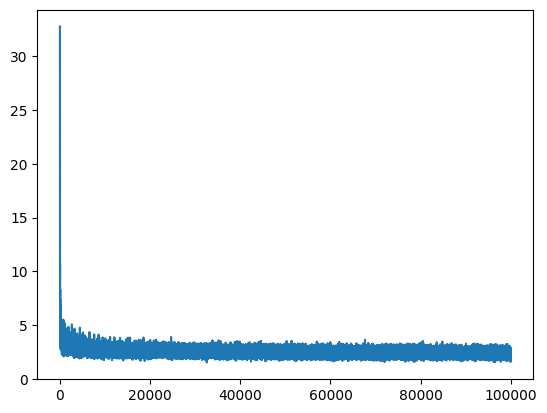

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4206, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4247, grad_fn=<NllLossBackward0>)

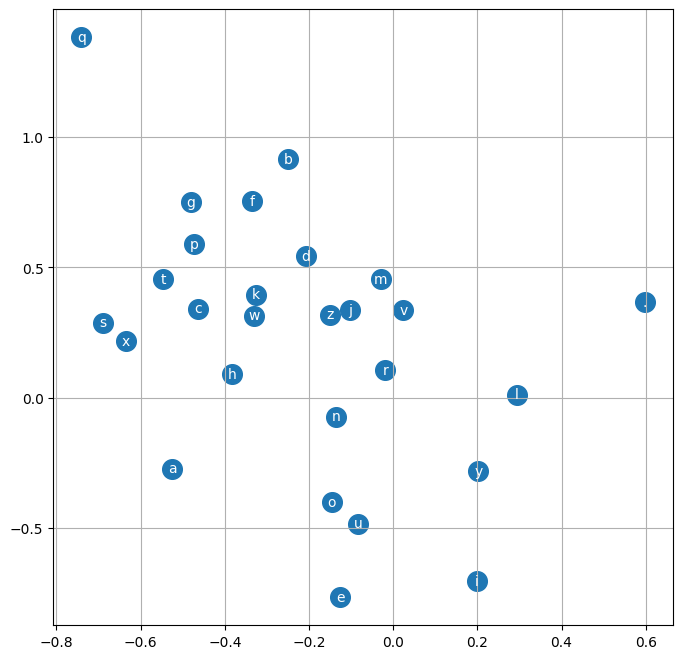

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s = 200)
for i in range(C.shape[0]):
  plt.text(C[i, 0], C[i, 1], itos[i], ha = 'center', va = 'center', color = 'white')
plt.grid(True)
plt.show()

In [ ]:
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim = 1)
    ix = torch.multinomial(probs, num_samples = 1).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

kon.
darmeel.
sha.
broecta.
rillen.
mich.
joce.
nutton.
lazella.
jorslemella.
redwis.
treat.
saddael.
zattes.
zondladellera.
arcya.
rivdosits.
rede.
alla.
koreth.
